In [1]:
#install.packages(c('repr','IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest','ggplot2','reshape2','entropy','quantmod'), repos='https://cran.rstudio.com/')
#install.packages(c('caret','curl','dbsca','dplyr','dslabs','e1071','egg','euralet','GGally','ggdedro','ggpubr','glmet','jpeg','MASS','microbechmark','plotrix','plyr','pracma','reshape2','ROCR','tm','zoo','glmnetUtils'),repos='https://cran.rstudio.com/')

In [2]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [3]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [4]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [5]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

In [6]:
colnames(airbnb) <- newnames

In [7]:
#Check de control
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [8]:
#mutate(airbnb,MetrosCuadrados = PiesCuadrados * 0,092903) En teoría está bien pero da error por versión
airbnb$MetrosCuadrados = airbnb$PiesCuadrados * 0.092903

In [9]:
#Control
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Asimismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [10]:
airbnb$CodigoPostal[airbnb$CodigoPostal==''] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='1'] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='-'] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28'] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002 28002'] <- 28002
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805'] <- 28005
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815'] <- 28015
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004'] <- 28004

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [11]:
summary(airbnb$CodigoPostal)

-        20013        20126         2015        25008 
           0            0            1            1            1            1 
       27004        27013           28        28001       280013        28002 
           1            1            0          231            1          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1795         1195          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          601           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            1           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            0           58           16            1            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004         NA's 
           1            1            0            1            0          441

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [12]:
#Como los nulos están más repetidos he puesto maxsum=7
summary(airbnb$CodigoPostal, maxsum=7)
summary(airbnb$CodigoPostal)

28012   28004   28005   28013   28014 (Other)    NA's 
   2060    1795    1195    1019     630    6067     441

-        20013        20126         2015        25008 
           0            0            1            1            1            1 
       27004        27013           28        28001       280013        28002 
           1            1            0          231            1          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1795         1195          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          601           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            1           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            0           58           16            1            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004         NA's 
           1            1            0            1            0          441

¿Cuales son los barrios que hay en el código postal 28012?

In [13]:
barriosEn28012 <- airbnb[airbnb$CodigoPostal==28012,]
summary(barriosEn28012$Barrio)

Embajadores                          Sol 
                        1449                          301 
                      Cortes              Palos de Moguer 
                         216                           46 
                     Palacio                      Acacias 
                          27                           13 
                 Universidad                     Arapiles 
                           4                            1 
                      Atocha                     Delicias 
                           1                            1 
                        Goya                     Abrantes 
                           1                            0 
                     Adelfas                   Aeropuerto 
                           0                            0 
                     Aguilas             Alameda de Osuna 
                           0                            0 
                     Almagro                     Almenara 
                           0                            0 
                 Almendrales                       Aluche 
                           0                            0 
                      Ambroz                      Amposta 
                           0                            0 
            Apostol Santiago                      Aravaca 
                           0                            0 
                       Arcos                    Argüelles 
                           0                            0 
               Bellas Vistas                   Berruguete 
                           0                            0 
                  Buenavista                     Butarque 
                           0                            0 
                  Campamento                     Canillas 
                           0                            0 
                  Canillejas                     Cármenes 
                           0                            0 
               Casa de Campo   Casco Histórico de Barajas 
                           0                            0 
 Casco Histórico de Vallecas Casco Histórico de Vicálvaro 
                           0                            0 
                  Castellana                     Castilla 
                           0                            0 
                 Castillejos                      Chopera 
                           0                            0 
               Ciudad Jardín         Ciudad Universitaria 
                           0                            0 
                      Colina                     Comillas 
                           0                            0 
                  Concepción                   Corralejos 
                           0                            0 
                 Costillares               Cuatro Caminos 
                           0                            0 
              Cuatro Vientos                    El Goloso 
                           0                            0 
                  El Plantío                      El Viso 
                           0                            0 
                   Entrevías                     Estrella 
                           0                            0 
                   Fontarrón             Fuente del Berro 
                           0                            0 
               Fuentelareina                   Gaztambide 
                           0                            0 
                  Guindalera                       Hellín 
                           0                            0 
              Hispanoamérica                        Ibiza 
                           0                            0 
                    Imperial                    Jerónimos 
                           0                            0 
                    Justicia                       La Paz 
                           0                            0 
     

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [14]:
summary(barriosEn28012$Barrio)

Embajadores                          Sol 
                        1449                          301 
                      Cortes              Palos de Moguer 
                         216                           46 
                     Palacio                      Acacias 
                          27                           13 
                 Universidad                     Arapiles 
                           4                            1 
                      Atocha                     Delicias 
                           1                            1 
                        Goya                     Abrantes 
                           1                            0 
                     Adelfas                   Aeropuerto 
                           0                            0 
                     Aguilas             Alameda de Osuna 
                           0                            0 
                     Almagro                     Almenara 
                           0                            0 
                 Almendrales                       Aluche 
                           0                            0 
                      Ambroz                      Amposta 
                           0                            0 
            Apostol Santiago                      Aravaca 
                           0                            0 
                       Arcos                    Argüelles 
                           0                            0 
               Bellas Vistas                   Berruguete 
                           0                            0 
                  Buenavista                     Butarque 
                           0                            0 
                  Campamento                     Canillas 
                           0                            0 
                  Canillejas                     Cármenes 
                           0                            0 
               Casa de Campo   Casco Histórico de Barajas 
                           0                            0 
 Casco Histórico de Vallecas Casco Histórico de Vicálvaro 
                           0                            0 
                  Castellana                     Castilla 
                           0                            0 
                 Castillejos                      Chopera 
                           0                            0 
               Ciudad Jardín         Ciudad Universitaria 
                           0                            0 
                      Colina                     Comillas 
                           0                            0 
                  Concepción                   Corralejos 
                           0                            0 
                 Costillares               Cuatro Caminos 
                           0                            0 
              Cuatro Vientos                    El Goloso 
                           0                            0 
                  El Plantío                      El Viso 
                           0                            0 
                   Entrevías                     Estrella 
                           0                            0 
                   Fontarrón             Fuente del Berro 
                           0                            0 
               Fuentelareina                   Gaztambide 
                           0                            0 
                  Guindalera                       Hellín 
                           0                            0 
              Hispanoamérica                        Ibiza 
                           0                            0 
                    Imperial                    Jerónimos 
                           0                            0 
                    Justicia                       La Paz 
                           0                            0 
     

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [15]:
paste("Los barrios que hay en el dataset son: ")
summary(airbnb$Barrio)

[1] "Los barrios que hay en el dataset son: "

Embajadores                  Universidad 
                        1844                         1358 
                     Palacio                          Sol 
                        1083                          940 
                    Justicia                       Cortes 
                         785                          750 
                   Trafalgar                    Argüelles 
                         315                          264 
             Palos de Moguer                         Goya 
                         262                          229 
            Puerta del Angel                   Guindalera 
                         199                          187 
                    Arapiles                    Recoletos 
                         182                          172 
                     Almagro                      Acacias 
                         155                          145 
                  Gaztambide                     Pacífico 
                         142                          138 
                       Lista                     Delicias 
                         129                          126 
              Cuatro Caminos                      Chopera 
                         120                          112 
                       Ibiza                   Rios Rosas 
                         105                          104 
                 Prosperidad                   Castellana 
                          98                           97 
                   Jerónimos                     Imperial 
                          90                           89 
                  San Isidro                  Castillejos 
                          85                           81 
                   San Diego                Bellas Vistas 
                          80                           79 
                      Ventas                Casa de Campo 
                          78                           75 
                Vista Alegre               Hispanoamérica 
                          74                           72 
            Fuente del Berro                   Berruguete 
                          68                           67 
                    Almenara                       Lucero 
                          62                           62 
                Nueva España                 Vallehermoso 
                          60                           60 
                    Comillas                     Numancia 
                          59                           58 
                      Opañel                Ciudad Jardín 
                          57                           55 
                Valdefuentes                      Adelfas 
                          55                           51 
               Valdeacederas                Pinar del Rey 
                          48                           47 
                  Concepción                  Almendrales 
                          46                           45 
                      Aluche                      El Viso 
                          45                           45 
                    Quintana                     Simancas 
                          45                           45 
                    Valverde                     Canillas 
                          45                           42 
                Pueblo Nuevo  Casco Histórico de Vallecas 
                          41                           40 
                  Peñagrande                Puerta Bonita 
                          39                           38 
                     Legazpi         Ciudad Universitaria 
                          37                           34 
                    Moscardó              Palomeras Bajas 
                          34                           33 
                 Costillares                   San Fermín 
                          32                           32 
     

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [16]:
#Para un mejor reflejo de lo que supone cada barrio se opta por maxsum 6
summary(airbnb$Barrio, maxsum=6)

Embajadores Universidad     Palacio         Sol    Justicia     (Other) 
       1844        1358        1083         940         785        7197

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [17]:
summary(airbnb$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903            5113             191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


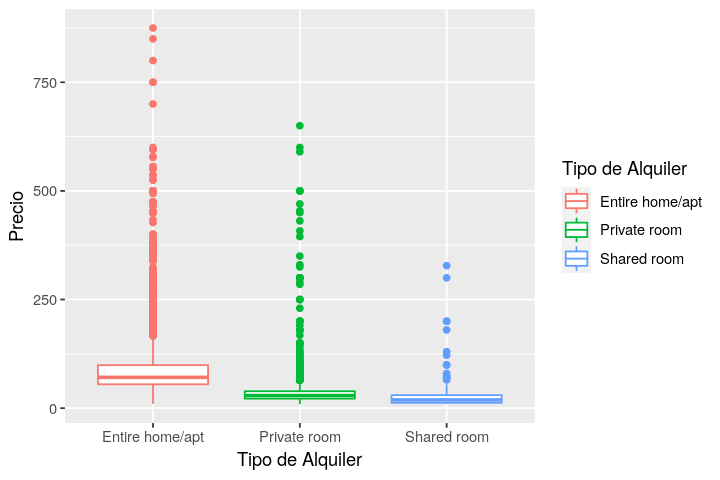

In [18]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
 scale_color_discrete(name="Tipo de Alquiler")+ylab("Precio")+xlab("Tipo de Alquiler")

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [19]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=="Entire home/apt",]
airbnb_private <- airbnb[airbnb$TipoAlquiler=="Private room",]
airbnb_shared <- airbnb[airbnb$TipoAlquiler=="Shared room",]
paste("El precio medio de alquiler por Entire home/apt es: ", mean(airbnb_entire$Precio, na.rm=TRUE))
paste("El precio medio de alquiler por Private room es: ", mean(airbnb_private$Precio, na.rm=TRUE))
paste("El precio medio de alquiler por Shared room es: ", mean(airbnb_shared$Precio, na.rm=TRUE))

[1] "El precio medio de alquiler por Entire home/apt es:  87.2966058763931"

[1] "El precio medio de alquiler por Private room es:  34.255135981217"

[1] "El precio medio de alquiler por Shared room es:  29.8534031413613"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [20]:
#Realizado arriba
summary(airbnb_entire$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903               0               0

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [21]:
#Se usa maxsum 6 para reflejar la proporción que queda fuera
summary(airbnb_entire$Barrio, maxsum=6)

Embajadores Universidad     Palacio         Sol      Cortes     (Other) 
       1228         984         769         701         574        3647

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [22]:
resultado_aggregate <- aggregate(.~Barrio,airbnb_entire,mean,na.rm=TRUE)

In [23]:
r_a_PrecioMedio <- resultado_aggregate[order(resultado_aggregate$Precio, decreasing = T),]
r_a_PrecioMedio[1:5, ]

,Barrio,CodigoPostal,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,Jerónimos,17.5,1,1,10,3.5,3,7.5,5,4758.5,2933.5,230,94.5,272.53095
14,Castellana,10.0,1,1,4,2.0,2,4.0,5,1543.0,1184.0,190,93.0,109.99715
3,Almagro,21.0,1,1,6,2.0,4,4.0,5,6401.0,0.0,185,91.0,0.00000
28,Guindalera,39.0,1,1,6,2.0,3,4.0,5,1735.0,1711.0,180,91.0,158.95703
42,Pinar del Rey,55.0,15,1,12,3.0,4,12.0,5,4669.0,108.0,155,74.0,10.03352


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [24]:
PrecioMedio<-aggregate(. ~ Barrio, airbnb_entire[c("Barrio","Precio")], mean,na.rm=TRUE)
ApartPorBarrios<-data.frame(table(airbnb_entire$Barrio))
colnames(ApartPorBarrios)<-c("Barrio","Freq")
AxBPrecioMedio<-merge(ApartPorBarrios,PrecioMedio,by="Barrio")
AxBPrecioMedio<-AxBPrecioMedio[order(AxBPrecioMedio$Precio,decreasing = T),]

In [25]:
AxBPrecioMedio

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
77,Palomas,4,309.75000
50,Fuentelareina,2,180.00000
93,Recoletos,135,161.92537
43,El Plantío,1,150.00000
30,Castellana,73,141.38889
27,Casco Histórico de Barajas,8,141.25000
6,Alameda de Osuna,4,138.75000
35,Ciudad Universitaria,13,138.30769
58,Jerónimos,62,131.82258


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [26]:
PrecioMedio_100<-subset(AxBPrecioMedio,AxBPrecioMedio$Freq>100)

BarriosMayorPrecioMedio<-head(PrecioMedio_100,5)$Barrios
head(BarriosMayorPrecioMedio)

NULL

In [27]:
PrecioMedio_100<-subset(AxBPrecioMedio,AxBPrecioMedio$Freq>100)

In [28]:
BarriosMayorPrecioMedio<-head(PrecioMedio_100,5)$Barrio
head(BarriosMayorPrecioMedio)

[1] Recoletos Goya      Sol       Trafalgar Justicia 
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


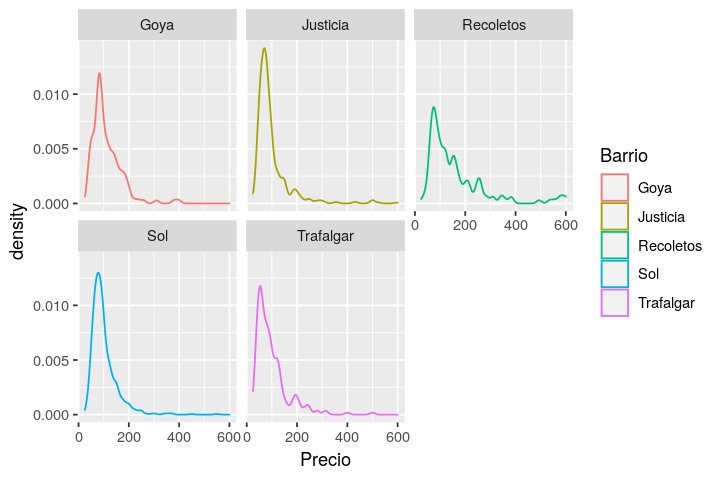

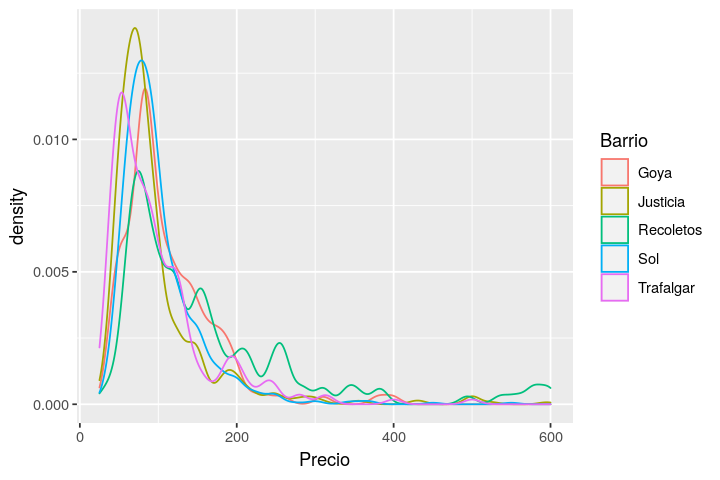

In [29]:
BMPM_1_5<-subset(airbnb_entire,Barrio %in% BarriosMayorPrecioMedio)

#Individuales
ggplot(data = BMPM_1_5, aes(x = Precio, color = Barrio)) + geom_density(bw=10) + facet_wrap( ~ Barrio)

#Comparativa
ggplot(BMPM_1_5, aes(x=Precio, color=Barrio))+geom_density(bw=10)


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [30]:
tamagno_medio <- aggregate(. ~ Barrio, airbnb_entire[c("Barrio","MetrosCuadrados")], mean,na.rm=TRUE)
PrecioMedioTamagno_100 <- merge(PrecioMedio_100,tamagno_medio,by="Barrio")

PrecioMedioTamagno_100 <- PrecioMedioTamagno_100[order(PrecioMedioTamagno_100$Precio,decreasing = T),]
PrecioMedioTamagno_100[1:5, ]

,Barrio,Freq,Precio,MetrosCuadrados
,<fct>,<int>,<dbl>,<dbl>
8,Recoletos,135,161.92537,26.66316
4,Goya,142,111.33803,51.68504
9,Sol,701,100.75036,45.61692
10,Trafalgar,223,98.57848,29.30426
5,Justicia,534,98.25468,28.52669


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


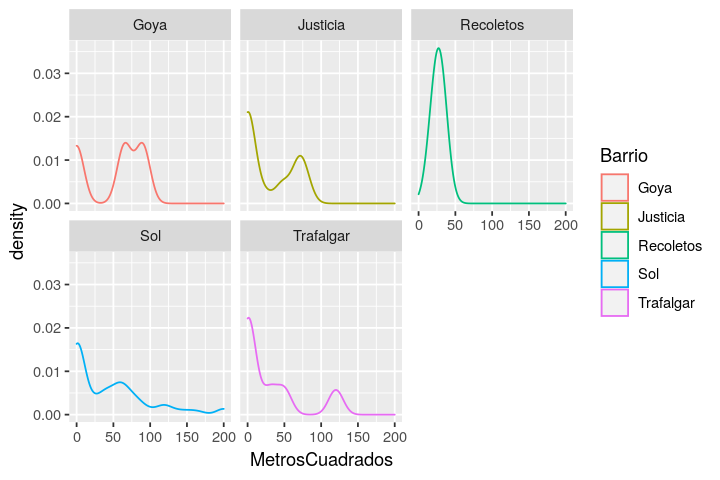

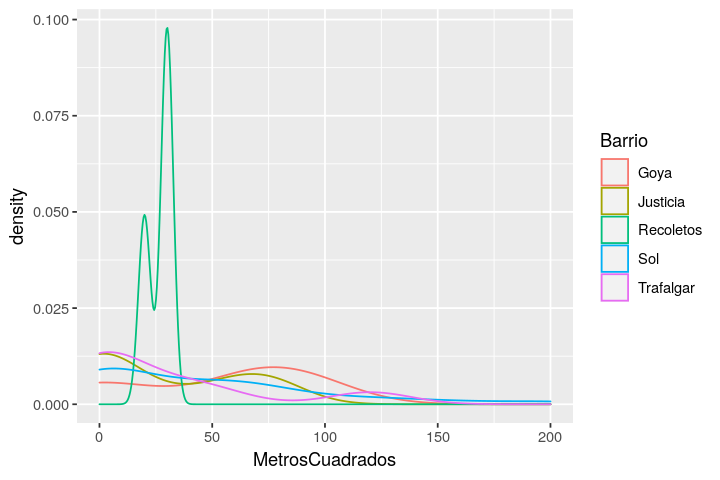

In [31]:
#Individuales
ggplot(data = BMPM_1_5, aes(x=MetrosCuadrados,color=Barrio)) + geom_density(bw=10) + facet_wrap( ~ Barrio)

#Comparativa
ggplot(BMPM_1_5,aes(x=MetrosCuadrados,color=Barrio))+geom_density()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [32]:
#Se pueden ejecutar varios test:
##Comprobamos si la distribución es de tipo Gaussiana:
print("Precio por barrio junto a test")

for (barrio in unique(BMPM_1_5$Barrio)){
    testDF<-BMPM_1_5[which(BMPM_1_5$Barrio==as.character(barrio)),]
    print(paste("Precio medio",barrio," = ",mean(testDF$MetrosCuadrados,na.rm=T)))
    if (nrow(testDF)>1000){
        testDF<-testDF[1:1000,]
    }
    testShapiro<-shapiro.test(testDF$Precio)
    print(paste("Test Shapiro del barrio",barrio,", p-valor =",testShapiro$p.value))
}

[1] "Precio por barrio junto a test"
[1] "Precio medio Sol  =  45.6169213833333"
[1] "Test Shapiro del barrio Sol , p-valor = 6.82296081876145e-30"
[1] "Precio medio Justicia  =  28.5266858823529"
[1] "Test Shapiro del barrio Justicia , p-valor = 6.68576869862315e-32"
[1] "Precio medio Recoletos  =  26.663161"
[1] "Test Shapiro del barrio Recoletos , p-valor = 2.80034621674868e-13"
[1] "Precio medio Goya  =  51.6850356666667"
[1] "Test Shapiro del barrio Goya , p-valor = 2.76797989326578e-11"
[1] "Precio medio Trafalgar  =  29.3042605714286"
[1] "Test Shapiro del barrio Trafalgar , p-valor = 5.98924729847284e-17"


In [33]:
#Test Kruskal:

testKrustal<-kruskal.test(MetrosCuadrados~Barrio,BMPM_1_5)
testKrustal
paste("El p-valor es =",testKrustal$p.value)


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


[1] "El p-valor es = 0.757443581555649"

In [34]:
#El p-valor es alto

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [35]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [36]:
cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que no tienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


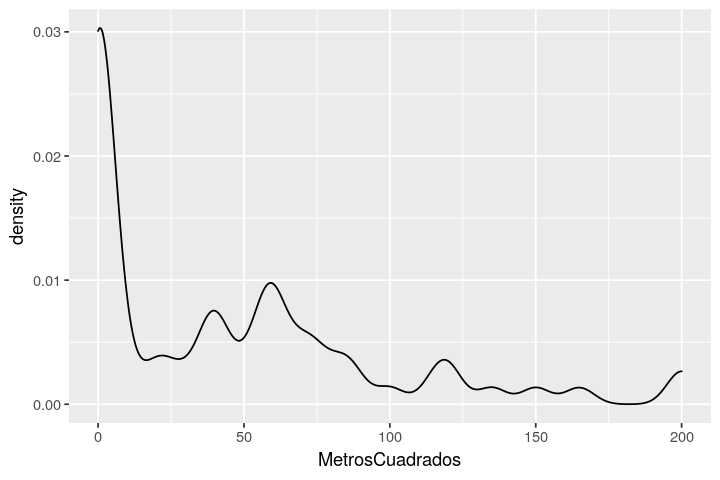

In [37]:
ggplot(barrio_sol,aes(x=MetrosCuadrados))+geom_density(bw=5)

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [38]:
#Selecciono los apartamentos con más de 20 m²
barrio_sol<-subset(barrio_sol, MetrosCuadrados>20)
nrow(barrio_sol)

[1] 33

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [39]:
modelo_0<-lm(barrio_sol,formula=Precio~NumBanyos+NumDormitorios+MetrosCuadrados+MaxOcupantes)
summary(modelo_0)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.276 -15.432  -5.095  19.767  68.926 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      31.2243    14.4988   2.154  0.04003 * 
NumBanyos         1.3061    15.1351   0.086  0.93185   
NumDormitorios   29.5746     9.1284   3.240  0.00308 **
MetrosCuadrados   0.1836     0.2225   0.825  0.41611   
MaxOcupantes      2.1814     4.6800   0.466  0.64474   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.23 on 28 degrees of freedom
Multiple R-squared:  0.7507,	Adjusted R-squared:  0.7151 
F-statistic: 21.08 on 4 and 28 DF,  p-value: 4.129e-08


In [40]:
modelo_1<-lm(barrio_sol,formula=Precio~NumDormitorios)
summary(modelo_1)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.214 -17.652  -5.652  18.457  61.786 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      43.762      8.919   4.907 2.80e-05 ***
NumDormitorios   38.890      4.156   9.359 1.52e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.37 on 31 degrees of freedom
Multiple R-squared:  0.7386,	Adjusted R-squared:  0.7302 
F-statistic: 87.58 on 1 and 31 DF,  p-value: 1.523e-10


In [41]:
modelo_2<-lm(barrio_sol,formula=Precio~MetrosCuadrados)
summary(modelo_2)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.388 -21.792  -0.115  10.642 121.693 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      29.5861    14.1142   2.096   0.0443 *  
MetrosCuadrados   0.9912     0.1520   6.521 2.81e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.83 on 31 degrees of freedom
Multiple R-squared:  0.5784,	Adjusted R-squared:  0.5648 
F-statistic: 42.53 on 1 and 31 DF,  p-value: 2.809e-07


In [42]:
modelo_3<-lm(barrio_sol,formula=Precio~NumDormitorios+MetrosCuadrados)
summary(modelo_3)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.019 -16.614  -1.743  20.521  66.975 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      37.3505    11.2732   3.313  0.00241 ** 
NumDormitorios   33.1291     7.4476   4.448  0.00011 ***
MetrosCuadrados   0.2001     0.2145   0.933  0.35824    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.43 on 30 degrees of freedom
Multiple R-squared:  0.746,	Adjusted R-squared:  0.729 
F-statistic: 44.04 on 2 and 30 DF,  p-value: 1.185e-09


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [43]:
modelo_MC<-lm(barrio_sol,formula=Precio~MetrosCuadrados)
confint(modelo_MC)["MetrosCuadrados",]

2.5 %    97.5 % 
0.6812218 1.3012104

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [44]:
modelo_ND<-lm(barrio_sol,formula=Precio~NumDormitorios)
confint(modelo_ND)["NumDormitorios",]

2.5 %   97.5 % 
30.41513 47.36572

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [45]:
dormitorios3<-sum(barrio_sol$NumDormitorios==3)
total_3dormitorios<-nrow(barrio_sol)
print(paste("La probabilidad de encontrar un apartamento de 3 dormitorios es:",dormitorios3/total_3dormitorios))
print("El margen de confianza es: ")
binom.test(dormitorios3,total_3dormitorios)$conf

[1] "La probabilidad de encontrar un apartamento de 3 dormitorios es: 0.0909090909090909"
[1] "El margen de confianza es: "


[1] 0.01915494 0.24331635
attr(,"conf.level")
[1] 0.95